We are using higher order linear regression to understand and learn the concept of overfitting

Importing the necessary Libraries

In [258]:
import matplotlib.pyplot as plot
import numpy as np

#here the %matplotlib inline command is used so that we can view the plots in the notebook directly
%matplotlib inline  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

Declaring Number of data points required and the polynomial degree for linear regression and uniform distribution from 0 to 1 for X for the given number of data points

In [259]:


#helps us get pseudo random numbers
np.random.seed(1)

#number of data points to be generated
data_points = 20

#degrees for polynomial:  0, 1, 3, 9
degrees = [0,1, 3, 9]

#Syntax : numpy.random.uniform(low=0.0, high=1.0, size=None)
x = np.sort(np.random.uniform(0, 1, data_points))
print(x)

[1.14374817e-04 2.73875932e-02 9.23385948e-02 1.40386939e-01
 1.46755891e-01 1.86260211e-01 1.98101489e-01 2.04452250e-01
 3.02332573e-01 3.45560727e-01 3.96767474e-01 4.17022005e-01
 4.17304802e-01 4.19194514e-01 5.38816734e-01 5.58689828e-01
 6.70467510e-01 6.85219500e-01 7.20324493e-01 8.78117436e-01]


Sampling N from the normal gaussian distribution 

In [260]:
n = np.random.normal(0,1)
print(n)

1.1337694423354374


Defining function for the equation
" sin(2*pi*X) " 

In [261]:
def Func(x):
  return np.sin(2*np.pi*x)

Calling the function to use for the equation : y = sin(2*pi*X) + 0.1 * N

We are using np.linspace here so that we can have an numeric sequence

[]

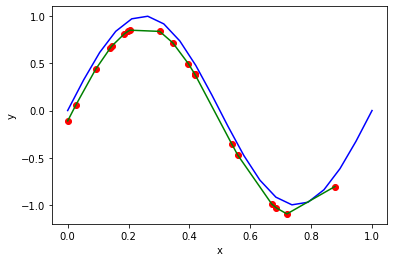

In [262]:
sin_sample = np.linspace(0, 1, 20).reshape((-1,1))
plot.plot(sin_s, Func(sin_sample), color='blue')
plot.scatter(x, y, color='red')
plot.plot(x, y, color='green')
plot.xlabel("x")
plot.ylabel("y")
plot.plot()

Splitting Training and testing data

In [263]:
train_x = np.sort(x[:10])
test_x = np.sort(x[10:])
train_x = train_x[:np.newaxis]
test_x = test_x[:np.newaxis]




In [264]:
train_y = Func(train_x) + 0.1 * n
print(train_y)
test_y = Func(test_x) + 0.1 * n
print(test_y)
y_new = np.full((10,1),n)
y_new

[0.11409558 0.28461025 0.66155186 0.88543762 0.91024568 1.03424744
 1.06067971 1.07270476 1.05980253 0.93847208]
[ 0.71747142  0.61144216  0.60990058  0.59955943 -0.12810503 -0.24708125
 -0.76434108 -0.80492454 -0.86929031 -0.57974468]


array([[1.13376944],
       [1.13376944],
       [1.13376944],
       [1.13376944],
       [1.13376944],
       [1.13376944],
       [1.13376944],
       [1.13376944],
       [1.13376944],
       [1.13376944]])

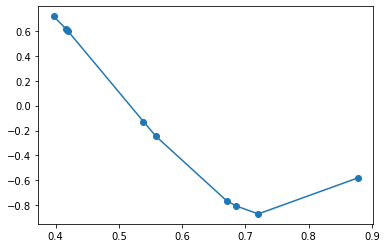

In [265]:
plot.scatter(test_x, test_y)
plot.plot(test_x, test_y)


In [266]:
from sklearn.pipeline import make_pipeline
def show_plot_func(degrees, train_x, train_y, test_x, preds):
  plot.scatter(X_train, y_train)
  plot.plot(x_sin, Func(sin_sample), color='green')
  plot.plot(X_test, preds, color='m')
  plot.title('When order, M='+degrees)
  plot.xlabel('X')
  plot.ylabel('y=sin(2*pi*X)+N')
  plot.xlim((0, 1))
  plot.ylim((-1, 1))
  plot.show()

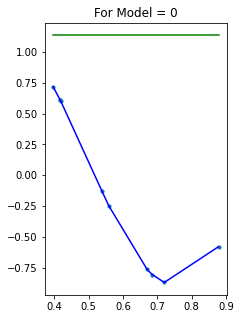

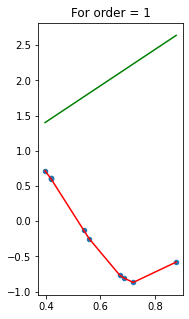

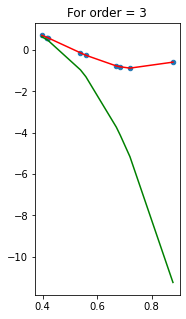

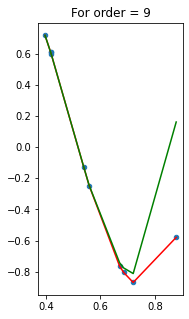

In [267]:
w = []
error_train = []
error_test = []
coe = []

model=LinearRegression()
model.fit(train_x.reshape(-1, 1), y_new)
y_pred_train = model.predict(train_x.reshape(-1, 1))
y_pred_test = model.predict(test_x.reshape(-1, 1))

train_error = np.sqrt(((y_pred_train-train_y)**2).mean())
error_train.append(train_error)

test_error = np.sqrt(((y_pred_test-test_y)**2).mean())
error_test.append(test_error)

coe.append(model.coef_)
#using coef_ because it contains the coefficients for the prediction of 
#the targets. It is also the same as if you trained a model to predict each of 
#the targets separately.
w = coe

plot.figure(figsize=(15,5))
plot.subplot(1,4,1)
plot.plot(test_x , test_y, color = 'b' , label = 'Function')
plot.scatter(test_x , test_y , s=10, label = 'sample')
plot.plot(test_x, y_pred_test, color = 'g', label = 'Model')
plot.title ('For Model = 0')
plot.show()

j=0
for i in range(1,10):
  model = LinearRegression()
  pol = PolynomialFeatures(degree=i , include_bias=True)
  pol.fit(train_x.reshape(-1, 1))
  x_train_pol = pol.transform(train_x.reshape(-1, 1))

  x_test_pol = pol.transform(test_x.reshape(-1, 1))
  model.fit(x_train_pol, train_y)

  y_pred_train_pol = model.predict(x_train_pol)
  tr_error = np.sqrt(((y_pred_train_pol-train_y)**2).mean())
  error_train.append(tr_error)

  y_pred_test_pol = model.predict(x_test_pol)
  tst_error = np.sqrt(((y_pred_test_pol-test_y)**2).mean())
  error_test.append(tst_error)

  if(i==1 or i==3 or i==9):
    plot.figure(figsize=(15,5))
    plot.subplot(1, len(degrees)+1, j+2)
    plot.scatter(test_x , test_y , s=20, label = 'sample')
    plot.plot(test_x, test_y, color = 'r', label = 'Function')
    plot.plot(test_x, y_pred_test_pol, color = 'g', label = 'Model')
    plot.title("For order = {}".format(degrees[j+1]))
    j=j+1
    coe.append(model.coef_)
    w = coe
    plot.show()



In [268]:
degrees = [0, 1, 3, 9]
c_list = {}
for i in range(len(degrees)):
  d = str(degrees[i])
  
  c = np.polyfit(train_x, train_y, degrees[i])

  M = 'M'+ d
  c_list[M] = c

  

M0_list = ["", "", "", "", "", "", "", "", ""]
M1_list = ["", "", "", "", "", "", "", ""]
M3_list = ["", "", "", "", "", ""]
M9_list = []

def append_to_list(c_list, degrees, M, M_list):
  for i in range(0, degrees+1):
    M_list.insert(i, coefs_list[M][i])

append_to_list(coefs_list, 0, 'M0', M0_list)
append_to_list(coefs_list, 1, 'M1', M1_list)
append_to_list(coefs_list, 3, 'M3', M3_list)
append_to_list(coefs_list, 9, 'M9', M9_list)

weight = {'M = 0': M0_list, 'M = 1': M1_list, 'M = 3': M3_list, 'M = 9': M9_list}
ind = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']

w_df = pd.DataFrame(weight, index=ind)
w_df

,M = 0,M = 1,M = 3,M = 9
w0,0.802185,2.57264,-18.2797,21.146362
w1,,0.379322,-6.39576,19.248520
w2,,,6.77944,-85.189767
w3,,,0.108927,2.203130
w4,,,,81.247671
w5,,,,0.036335
w6,,,,-41.343909
w7,,,,0.000071
w8,,,,6.283184
w9,,,,0.113377


Training error vs Testing error

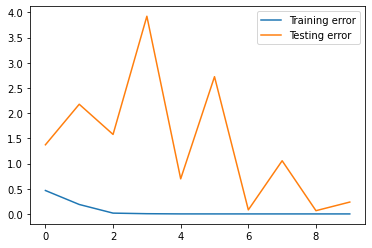

In [269]:
plot.plot(error_train, label='Training error')
plot.plot(error_test,label='Testing error')
plot.legend(loc='best')


Now we are generating 100 more random data point to see how it affects the model

In [270]:
additional_data = 120
X_latest = np.sort(np.random.uniform(0, 1, additional_data))
X_latest = X_latest[:,np.newaxis]

Y_latest = np.sin(2*np.pi*X_latest) + n * 0.1


No handles with labels found to put in legend.


[]

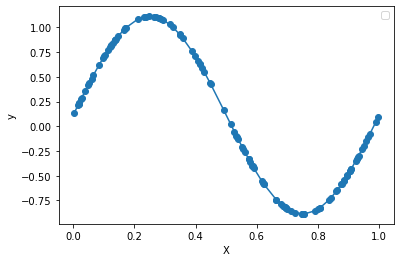

In [271]:
plot.scatter(X_latest, Y_latest)
plot.plot(X_latest, Y_latest)
plot.xlabel("X")
plot.ylabel("y")
plot.legend(loc='best')
plot.plot()

Regularizing using the sum of weights

[]

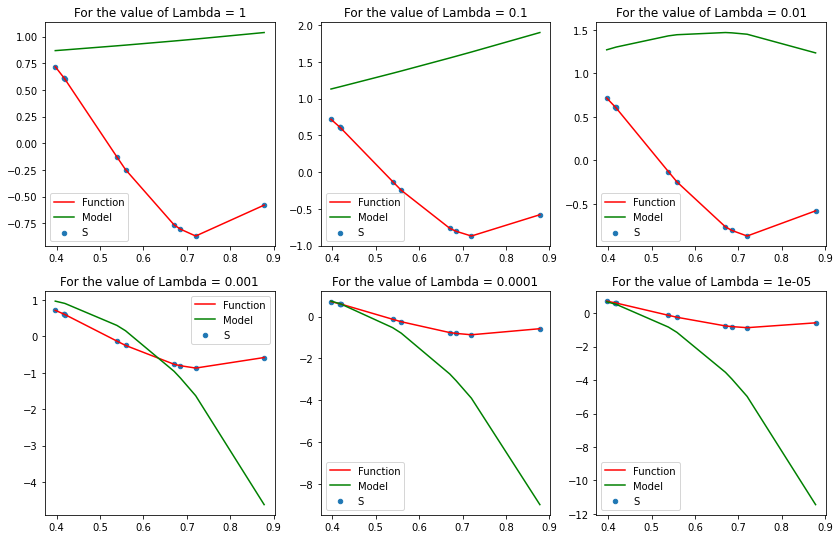

In [278]:

x_latest_pol = pol.transform(X_latest)
y_latest_pred = model.predict(x_latest_pol)
regression_train_error = []
regression_test_error = []
lam = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
plot.figure(figsize=(14,14))
for i in range(len(lam)):
  r= Ridge(alpha=lam[i])
  r.fit(x_train_pol,train_y)
  
  ridge_train_pred_y = r.predict(x_train_pol)
  train_ridge_error = np.sqrt(((ridge_train_pred_y - train_y)**2).mean())
  regression_train_error.append(train_ridge_error)

  ridge_test_pred_y = r.predict(x_test_pol)
  test_ridge_error = np.sqrt(((ridge_test_pred_y - test_y)**2).mean())
  regression_test_error.append(test_ridge_error)
  
  plot.subplot(len(lam)/2, len(lam)/2,i+1)
  plot.scatter(test_x, test_y, s=20, label = 'S')
  plot.plot(test_x,test_y,color='r', label = 'Function')
  plot.plot(test_x,ridge_test_pred_y,color='g', label='Model')
  plot.title("For the value of Lambda = {}".format(lam[i]))
  plot.legend(loc="best")
plot.plot()



